# 一元线性回归的Python应用

某公司计划研究销售人员数量对于新产品销售额的影响。

从其下属多家公司中随机抽取10个子公司，这10个子公司当你新产品销售额和销售人员数量统计数据在路径"数据/销售人员和销售量.csv"。

请试用一元线性回归方法研究人员数量对新产品销售额的计量关系。

In [1]:
import pandas as pd
data = pd.read_csv("datasets/销售人员和销售量.csv")
data

,地区,新产品销售额/万元,销售人员数量/人
0,1,385,17
1,2,251,10
2,3,701,44
3,4,479,30
4,5,433,22
5,6,411,15
6,7,355,11
7,8,217,5
8,9,581,31
9,10,653,36


## 1. 对变量作相关性分析
这里使用相关系数作相关分析，调用scipy.stats.pearsonr皮尔逊相关系数计算方法：

相关系数r检验y和x两个变量之间的线性相关的显著程度，其算式为

$$
r = \frac{\sum{(x_i-\bar{x})(y_i-\bar{y})}}{\sqrt{\sum{(x_i-\bar{x})^2\sum{(y_i-\bar{y})}}}}
$$
数学上可以证明：r在[-1, 1]范围，有：
- r>0时，y与x有一定的正线性相关，越接近1正的相关性越大
- r<0时，y与x有一定的负线性相关，越接近-1负的相关性越大

In [2]:
import scipy.stats as stats
x = data["销售人员数量/人"]
y = data["新产品销售额/万元"]
r = stats.pearsonr(x, y)[0]
r

0.969906207108702

观察相关系数的值为0.97，说明两者的存在很强的正相关关系，我们下面使用回归分析来计量两者的统计关系。

## 2. 使用statsmodels作一元线性回归

In [3]:
import statsmodels.api as sm
data['Intercept'] = 1.
y = data["新产品销售额/万元"]
x = data[['Intercept', "销售人员数量/人"]]
model = sm.OLS(y, x)
result = model.fit()
result.summary2(alpha=0.05)

/Users/hans/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.933   
Dependent Variable: 新产品销售额/万元        AIC:                104.6022
Date:               2022-09-27 17:37 BIC:                105.2073
No. Observations:   10               Log-Likelihood:     -50.301 
Df Model:           1                F-statistic:        126.9   
Df Residuals:       8                Prob (F-statistic): 3.46e-06
R-squared:          0.941            Scale:              1712.1  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  176.2952   27.3269   6.4514  0.0002  113.2793  239.3111
销售人员数量/人    12.2310    1.0855  11.2671  0.0000    9.7277   14.7343
-----------------------------------------------------------------
Omnibus:               0.718        Durbin-Watson:          1.407
Prob(Omnibus):         0.698        Jarque-Bera (JB):       0.588
Skew:                  -0.198       Prob(JB):               0.745
Kurtosis:              1.879        Condition No.:          53   
=================================================================

"""

In [4]:
print("斜率: %.2f" %12.23)
print("截距: %.2f" %176.30)
print("拟合优度R-squared: %.2f" % 0.958)
print("斜率估计量的标准误差: %.2f" % 1.086)
print("截距估计量的标准误差: %.2f" % 27.327)

斜率: 12.23
截距: 176.30
拟合优度R-squared: 0.96
斜率估计量的标准误差: 1.09
截距估计量的标准误差: 27.33


模型的回归方程是
$$
新产品销售额/万元 = 12.23 \times 销售人员数量/人 + 176.3 
$$

根据方程能够得到以下结论：**销售人员数量每增加1人，平均会带来12.23万元新产品销售额的增加。**

## 3. 绘制回归图

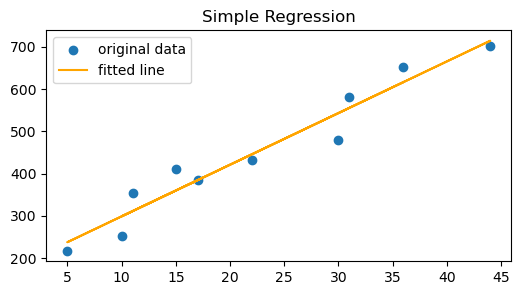

In [10]:
x = data["销售人员数量/人"]
y = data["新产品销售额/万元"]

import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.scatter(x, y, label='original data')
plt.plot(x,  12.23*x+176.3, label='fitted line', color='orange')
plt.title('Simple Regression')
plt.legend()
plt.show()